In [1]:
import random 
import numpy as np 
from deap import base, creator, tools, algorithms 

import matplotlib.pyplot as plt 


In [2]:
seed = 42 
X_MIN, X_MAX = -10, 10 

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
toolbox = base.Toolbox() 
# Generates a random float between X_MIN and X_MAX
toolbox.register("attr_float", random.uniform, X_MIN, X_MAX)

# Creates a single individual chromosome
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)

# Creates a population of individuals using the individual chromosome and stores them in a list
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [5]:
def evaluate(individual):
    x = individual[0]
    return (x * np.sin(x),)  # First value is max, second is min

In [6]:
toolbox.register("evaluate", evaluate) 

# Using cxSimulatedBinaryBounded to handle constraints of X_MIN and X_MAX
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=X_MIN, up=X_MAX, eta=5)

# Using mutGaussian because it is a continuous problem, mu is the mean, sigma is the standard deviation, indpb is the probability of each attribute to be mutated
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)

In [7]:
def run_ga():
  pop = toolbox.population(n=10) 
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values) 
  stats.register("avg", lambda vals: round(np.mean([v[0] for v in vals]), 2))
  stats.register("std", lambda vals: round(np.std([v[0] for v in vals]), 2))
  stats.register("min", lambda vals: round(min(v[0] for v in vals), 2))
  stats.register("max", lambda vals: round(max(v[0] for v in vals), 2))

  pop, logbook = algorithms.eaSimple(population=pop,
                                    toolbox=toolbox,
                                    cxpb=0.5, 
                                    mutpb=0.4,
                                    ngen=100,
                                    stats=stats,
                                    halloffame=hof, 
                                    verbose=True)
  
  return pop, logbook, hof

pop, logbook, hof = run_ga() 

best_x = hof[0][0]
best_fitness = hof[0].fitness.values[0] 

print(f"\n✅ Best solution: x = {best_x:.5f} with fitness = {best_fitness:.5f}")

gen	nevals	avg 	std 	min  	max 
0  	10    	2.41	3.65	-3.83	7.53
1  	9     	5.73	1.61	2.89 	7.63
2  	5     	7.1 	0.76	5.51 	7.64
3  	5     	7.07	1.76	1.79 	7.91
4  	7     	7.74	0.2 	7.29 	7.92
5  	7     	7.78	0.27	7.14 	7.92
6  	7     	7.91	0   	7.91 	7.92
7  	8     	7.82	0.23	7.14 	7.92
8  	6     	7.92	0   	7.92 	7.92
9  	5     	7.91	0.03	7.83 	7.92
10 	7     	7.92	0   	7.92 	7.92
11 	9     	7.88	0.11	7.56 	7.92
12 	7     	7.92	0   	7.91 	7.92
13 	10    	7.88	0.1 	7.59 	7.92
14 	7     	7.92	0   	7.92 	7.92
15 	7     	7.92	0   	7.91 	7.92
16 	6     	7.92	0   	7.92 	7.92
17 	8     	7.92	0   	7.92 	7.92
18 	9     	7.92	0   	7.92 	7.92
19 	5     	7.92	0   	7.92 	7.92
20 	8     	7.67	0.74	5.45 	7.92
21 	8     	7.92	0   	7.92 	7.92
22 	6     	7.86	0.17	7.34 	7.92
23 	9     	7.86	0.17	7.34 	7.92
24 	7     	7.92	0   	7.92 	7.92
25 	9     	7.75	0.51	6.22 	7.92
26 	4     	7.92	0   	7.92 	7.92
27 	7     	7.86	0.16	7.38 	7.92
28 	9     	7.67	0.73	5.5  	7.92
29 	8     	7.87	0.14	7.46 	7.92
30 	9   

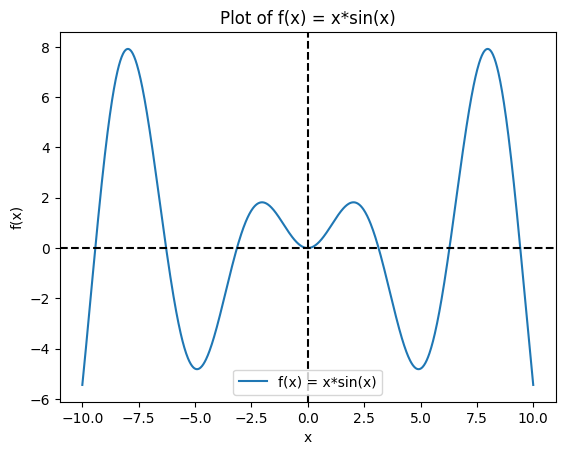

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-10, 10, 1000)
y_vals = x_vals * np.sin(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x*sin(x)")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = x*sin(x)")
plt.legend()
plt.show()

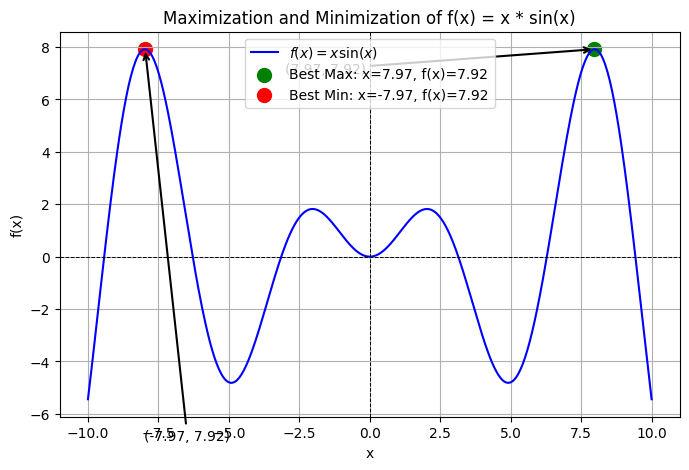

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.sin(x)

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 500)
y_values = f(x_values)

best_max_x = -best_x 
best_min_x = best_x

# Get best max and best min solutions
best_y_max = f(best_max_x)
best_y_min = f(best_x)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r'$f(x) = x \sin(x)$', color='b')

# Highlight best max solution
plt.scatter(best_max_x, best_y_max, color='g', s=100, label=f"Best Max: x={best_max_x:.2f}, f(x)={best_y_max:.2f}")
plt.annotate(f"({best_max_x:.2f}, {best_y_max:.2f})", 
             xy=(best_max_x, best_y_max), 
             xytext=(-3, 7), 
             arrowprops=dict(arrowstyle="->", lw=1.5))

# Highlight best min solution
plt.scatter(best_min_x, best_y_min, color='r', s=100, label=f"Best Min: x={best_min_x:.2f}, f(x)={best_y_min:.2f}")
plt.annotate(f"({best_min_x:.2f}, {best_y_min:.2f})", 
             xy=(best_min_x, best_y_min), 
             xytext=(-8, -7), 
             arrowprops=dict(arrowstyle="->", lw=1.5))

# Labels and title
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Maximization and Minimization of f(x) = x * sin(x)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid()
plt.show()

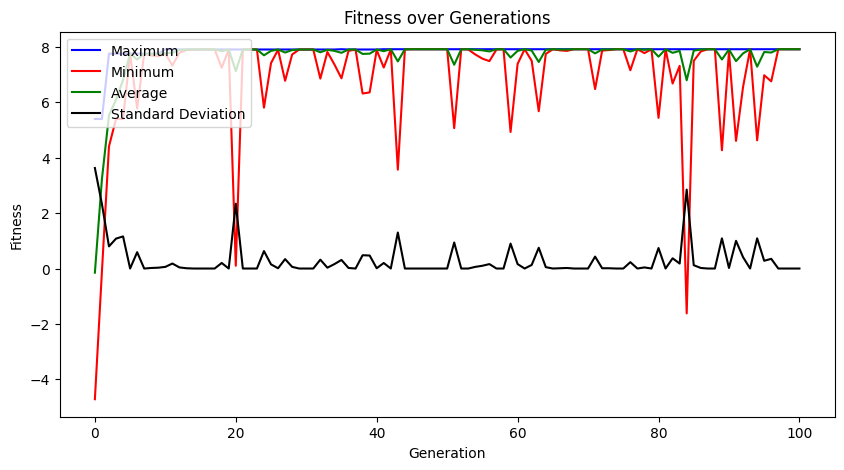

In [ ]:
# Plot Fitness Evolution
plt.figure(figsize=(10, 5)) 
gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_maxs = logbook.select("max")
fit_avgs = logbook.select("avg")
fit_stds = logbook.select("std")  

plt.plot(gen, fit_maxs, "b-", label="Maximum")
plt.plot(gen, fit_mins, "r-", label="Minimum")
plt.plot(gen, fit_avgs, "g-", label="Average")
plt.plot(gen, fit_stds, "k-", label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper left")
plt.title("Fitness over Generations")
plt.show()